
# **Exploratory Data Analysis of Movies Dataset**

## **Tasks :**

1. The Best and Worst Movies in terms of Budget , Revenue , Proft, Ratings ....

2. Find Movies That Have More Than 5 Milions of Budget And Sorting Them by ROI

3. Top Movies Sorted Based  on Highest Revenue

4. Top Movies Sorted Based Lowest Profit

5. Top Movies Sorted Based Lowest ROI and Minimum Budget of 5 million

6. Top Movies Sorted Based Lowest Rating and Minumum Votes of 5000 and Miniumum Budget of 5 million

7. Top Movies Sorted Based On Popularity

8. Action or Thriller Movies with Original Lanaguage English & Minimum Rating of 7.5 (Most Recent)

9. Get Wordcloud of Title

10. Get WordCloud of Tagline

11. Are Franchise More Successful ?
(Franchise movies are a type of film that is part of a series or collection of movies that are related to each other through a shared universe, characters, or storylines. These movies are often produced by major studios and are intended to be part of a larger brand or intellectual property.)

12. The Most Successful Franchise Movies

13. The Most Successful Directors





In [1]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
#read the dataframe
df= pd.read_csv('/content/movies_complete.csv')

In [3]:
df.head()

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.0,373.554033,Pixar Animation Studios,...,7.7,21.946943,81.0,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.0,262.797249,TriStar Pictures|Teitler Film|Interscope Commu...,...,6.9,17.015539,104.0,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,...,6.5,11.712900,101.0,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,16.0,81.452156,Twentieth Century Fox Film Corporation,...,6.1,3.859495,127.0,"Cheated on, mistreated and stepped on, the wom...",English,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Whitney Houston|Angela Bassett|Loretta Devine|...,10,10,Forest Whitaker
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,NaN,76.578911,Sandollar Productions|Touchstone Pictures,...,5.7,8.387519,106.0,Just when George Banks has recovered from his ...,English,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12,7,Charles Shyer


In [4]:
#check info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     44691 non-null  int64  
 1   title                  44691 non-null  object 
 2   tagline                20284 non-null  object 
 3   release_date           44657 non-null  object 
 4   genres                 42586 non-null  object 
 5   belongs_to_collection  4463 non-null   object 
 6   original_language      44681 non-null  object 
 7   budget_musd            8854 non-null   float64
 8   revenue_musd           7385 non-null   float64
 9   production_companies   33356 non-null  object 
 10  production_countries   38835 non-null  object 
 11  vote_count             44691 non-null  float64
 12  vote_average           42077 non-null  float64
 13  popularity             44691 non-null  float64
 14  runtime                43179 non-null  float64
 15  ov

In [5]:
#summary statistics of dataframe
df.describe()

,id,budget_musd,revenue_musd,vote_count,vote_average,popularity,runtime,cast_size,crew_size
count,44691.000000,8854.000000,7385.000000,44691.000000,42077.000000,44691.000000,43179.000000,44691.000000,44691.000000
mean,107186.242845,21.669886,68.968649,111.653778,6.003341,2.957460,97.566850,12.479090,10.313643
std,111806.362236,34.359837,146.608966,495.322313,1.281060,6.040008,34.653409,12.124663,15.892154
min,2.000000,0.000001,0.000001,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,26033.500000,2.000000,2.405420,3.000000,5.300000,0.402038,86.000000,6.000000,2.000000
50%,59110.000000,8.200000,16.872671,10.000000,6.100000,1.150055,95.000000,10.000000,6.000000
75%,154251.000000,25.000000,67.642693,35.000000,6.800000,3.768882,107.000000,15.000000,12.000000
max,469172.000000,380.000000,2787.965087,14075.000000,10.000000,547.488298,1256.000000,313.000000,435.000000


# Best and Worst Movies

In [7]:
#Best Movies in terms of budget, revenue, vote count, and popularity
col = ['budget_musd','revenue_musd','vote_count','vote_average','popularity']

for i in col:
  print(df[df[i]==df[i].max()][['title',i]])


                                             title  budget_musd
16986  Pirates of the Caribbean: On Stranger Tides        380.0
        title  revenue_musd
14448  Avatar   2787.965087
           title  vote_count
15368  Inception     14075.0
                                          title  vote_average
186                                    Reckless          10.0
393                        Girl in the Cadillac          10.0
702    The Haunted World of Edward D. Wood, Jr.          10.0
732      Carmen Miranda: Bananas Is My Business          10.0
1615                   Other Voices Other Rooms          10.0
...                                         ...           ...
44287                           The Human Surge          10.0
44431                          First Round Down          10.0
44483                             Der Herr Karl          10.0
44589         The Many Faces of Christopher Lee          10.0
44598     LEGO DC Super Hero Girls: Brain Drain          10.0

[184 rows x 2

In [8]:
#Worst Movies in terms of budget, revenue, vote count, and popularity
for i in col:
  print(df[df[i]==df[i].min()][['title',i]])


                                    title  budget_musd
913                          East of Eden     0.000001
2169                                 Slam     0.000001
2457                         Lost & Found     0.000001
3312                         Modern Times     0.000001
3965                       Less Than Zero     0.000001
9756                Incident at Loch Ness     0.000001
12938  Angus, Thongs and Perfect Snogging     0.000001
15325                            Cool Air     0.000001
15755                           Tere Naam     0.000001
16483                      Speed & Angels     0.000001
19086             Love, Wedding, Marriage     0.000001
19716                 We Should Not Exist     0.000001
21103                       Fetching Cody     0.000001
22041                      Aquí Entre Nos     0.000001
24821                         She Monkeys     0.000001
27651                         Fear Clinic     0.000001
31052                        Victoria Day     0.000001
33516     

In [9]:
#calculating profit and ROI
df['profit']=df['revenue_musd']-df['budget_musd']
df['roi']=df['profit']/df['budget_musd']

In [10]:
#checking new columns
df.head()

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director,profit,roi
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.0,373.554033,Pixar Animation Studios,...,81.0,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter,343.554033,11.451801
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.0,262.797249,TriStar Pictures|Teitler Film|Interscope Commu...,...,104.0,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston,197.797249,3.043035
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,...,101.0,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch,NaN,NaN
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,16.0,81.452156,Twentieth Century Fox Film Corporation,...,127.0,"Cheated on, mistreated and stepped on, the wom...",English,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Whitney Houston|Angela Bassett|Loretta Devine|...,10,10,Forest Whitaker,65.452156,4.090760
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,NaN,76.578911,Sandollar Productions|Touchstone Pictures,...,106.0,Just when George Banks has recovered from his ...,English,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12,7,Charles Shyer,NaN,NaN


# Movies That Have More Than 5 Milions of Budget sorted by ROI

In [11]:
# Movies That Have More Than 5 Milions of Budget sorted by ROI
print(df[df['budget_musd']>5].sort_values(by='roi',ascending=False)[['title','roi']])

                                                title        roi
1055                       E.T. the Extra-Terrestrial  74.520507
255                                         Star Wars  69.490728
1327                                             Jaws  66.236286
1866                                     The Exorcist  54.163268
351                       Four Weddings and a Funeral  41.450139
...                                               ...        ...
44369                    The Blonde with Bare Breasts        NaN
44439                                         Detroit        NaN
44499  Good Guys Go to Heaven, Bad Guys Go to Pattaya        NaN
44570                      The Visitors: Bastille Day        NaN
44579                       House of the Long Shadows        NaN

[5163 rows x 2 columns]


In [12]:
df.sort_values(by='revenue_musd',ascending=False)[['title','revenue_musd']].head(10)

,title,revenue_musd
14448,Avatar,2787.965087
26265,Star Wars: The Force Awakens,2068.223624
1620,Titanic,1845.034188
17669,The Avengers,1519.557910
24812,Jurassic World,1513.528810
28501,Furious 7,1506.249360
26268,Avengers: Age of Ultron,1405.403694
17294,Harry Potter and the Deathly Hallows: Part 2,1342.000000
21876,Frozen,1274.219009
41556,Beauty and the Beast,1262.886337


In [13]:
df.sort_values(by='profit')

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director,profit,roi
20959,57201,The Lone Ranger,Never Take Off the Mask,2013-07-03,Action|Adventure|Western,NaN,en,255.000000,89.289910,Walt Disney Pictures|Jerry Bruckheimer Films|I...,...,149.0,The Texas Rangers chase down a gang of outlaws...,English,<img src='http://image.tmdb.org/t/p/w185//b2je...,Johnny Depp|Armie Hammer|William Fichtner|Hele...,60,35,Gore Verbinski,-165.710090,-0.649843
7164,10733,The Alamo,You will never forget,2004-04-07,Western|History|War,NaN,en,145.000000,25.819961,Imagine Entertainment|Touchstone Pictures,...,137.0,Based on the 1836 standoff between a group of ...,English|Español,<img src='http://image.tmdb.org/t/p/w185//aZrW...,Dennis Quaid|Billy Bob Thornton|Jason Patric|P...,20,145,John Lee Hancock,-119.180039,-0.821931
16659,50321,Mars Needs Moms,Mom needs a little space.,2011-03-09,Adventure|Animation|Family,NaN,en,150.000000,38.992758,Walt Disney Animation Studios,...,88.0,"When Martians suddenly abduct his mom, mischie...",English,<img src='http://image.tmdb.org/t/p/w185//lOKq...,Seth Green|Joan Cusack|Dan Fogler|Breckin Meye...,12,7,Simon Wells,-111.007242,-0.740048
43611,339964,Valerian and the City of a Thousand Planets,NaN,2017-07-20,Adventure|Science Fiction|Action,NaN,en,197.471676,90.024292,EuropaCorp,...,137.0,"In the 28th century, Valerian and Laureline ar...",Français|English,<img src='http://image.tmdb.org/t/p/w185//jfIp...,Dane DeHaan|Cara Delevingne|Clive Owen|Rihanna...,118,316,Luc Besson,-107.447384,-0.544115
2684,1911,The 13th Warrior,Prey for the living.,1999-08-27,Adventure|Fantasy|Action,NaN,en,160.000000,61.698899,Touchstone Pictures,...,102.0,"In AD 922, Arab courtier, Ahmad Ibn Fadlan acc...",English|Norsk,<img src='http://image.tmdb.org/t/p/w185//7pyh...,Antonio Banderas|Vladimir Kulich|Dennis Storhø...,19,17,John McTiernan,-98.301101,-0.614382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44686,439050,Subdue,Rising and falling between a man and woman,NaN,Drama|Family,NaN,fa,NaN,NaN,NaN,...,90.0,Rising and falling between a man and woman.,فارسی,<img src='http://image.tmdb.org/t/p/w185//pfC8...,Leila Hatami|Kourosh Tahami|Elham Korda,3,9,Hamid Nematollah,NaN,NaN
44687,111109,Century of Birthing,NaN,2011-11-17,Drama,NaN,tl,NaN,NaN,Sine Olivia,...,360.0,An artist struggles to finish his work while a...,NaN,<img src='http://image.tmdb.org/t/p/w185//xZkm...,Angel Aquino|Perry Dizon|Hazel Orencio|Joel To...,11,6,Lav Diaz,NaN,NaN
44688,67758,Betrayal,A deadly game of wits.,2003-08-01,Action|Drama|Thriller,NaN,en,NaN,NaN,American World Pictures,...,90.0,"When one of her hits goes wrong, a professiona...",English,<img src='http://image.tmdb.org/t/p/w185//eGga...,Erika Eleniak|Adam Baldwin|Julie du Page|James...,15,5,Mark L. Lester,NaN,NaN
44689,227506,Satan Triumphant,NaN,1917-10-21,NaN,NaN,en,NaN,NaN,Yermoliev,...,87.0,"In a small town live two brothers, one a minis...",NaN,<img src='http://image.tmdb.org/t/p/w185//aorB...,Iwan Mosschuchin|Nathalie Lissenko|Pavel Pavlo...,5,2,Yakov Protazanov,NaN,NaN


# Movies sorted based on a condition

In [14]:
#function for sorting movies on different conditions
def highest_lowest(by, ascending_order=False, budget=0, votes=0):
  return df[(df['budget_musd']>budget) & (df['vote_count']>votes)].sort_values(by=by,ascending=ascending_order)[['title',by]]


In [15]:
# Movies That Have More Than 5 Milions of Budget sorted by ROI
highest_lowest(by='roi', ascending_order=False, budget=5, votes=0)

,title,roi
1055,E.T. the Extra-Terrestrial,74.520507
255,Star Wars,69.490728
1327,Jaws,66.236286
1866,The Exorcist,54.163268
351,Four Weddings and a Funeral,41.450139
...,...,...
44369,The Blonde with Bare Breasts,NaN
44439,Detroit,NaN
44499,"Good Guys Go to Heaven, Bad Guys Go to Pattaya",NaN
44570,The Visitors: Bastille Day,NaN


In [16]:
# Movies sorted by highest revenue
highest_lowest(by='revenue_musd', ascending_order=False, budget=0, votes=0)

,title,revenue_musd
14448,Avatar,2787.965087
26265,Star Wars: The Force Awakens,2068.223624
1620,Titanic,1845.034188
17669,The Avengers,1519.557910
24812,Jurassic World,1513.528810
...,...,...
44617,Bloodletting,NaN
44622,Dead Daughters,NaN
44625,Thick Lashes of Lauri Mäntyvaara,NaN
44629,Corporate Event,NaN


In [17]:
# Movies sorted by lowest profit
highest_lowest(by='profit', ascending_order=True, budget=0, votes=0)

,title,profit
20959,The Lone Ranger,-165.710090
7164,The Alamo,-119.180039
16659,Mars Needs Moms,-111.007242
43611,Valerian and the City of a Thousand Planets,-107.447384
2684,The 13th Warrior,-98.301101
...,...,...
44617,Bloodletting,NaN
44622,Dead Daughters,NaN
44625,Thick Lashes of Lauri Mäntyvaara,NaN
44629,Corporate Event,NaN


In [18]:
# Movies sorted by highest popularity
highest_lowest(by='popularity', ascending_order=False, budget=0, votes=0)

,title,popularity
30330,Minions,547.488298
32927,Wonder Woman,294.337037
41556,Beauty and the Beast,287.253654
42940,Baby Driver,228.032744
24187,Big Hero 6,213.849907
...,...,...
33051,Criminally Insane,0.000308
35188,Slime City,0.000001
23021,The Master Gunfighter,0.000001
29201,Falling From Grace,0.000001


In [19]:
# Movies sorted by lowest rating and minumum votes of 5000 and miniumum budget of 5 million
highest_lowest(by='vote_average', ascending_order=True, budget=5, votes=5000)

,title,vote_average
30694,Batman v Superman: Dawn of Justice,5.7
30175,Suicide Squad,5.9
23107,Lucy,6.3
18825,Prometheus,6.3
16986,Pirates of the Caribbean: On Stranger Tides,6.4
...,...,...
291,Pulp Fiction,8.3
12396,The Dark Knight,8.3
2816,Fight Club,8.3
313,The Shawshank Redemption,8.5


# Action or Thriller Movie with original language English and minimum Rating of 7.5

In [20]:
#creating filters
genres_1 = df['genres'].str.contains('Action')
genres_2 = df['genres'].str.contains('Thriller')
original_language = df['original_language']=='en'
rating = df['vote_average']>=7.5

In [21]:
#top movies based on the filters
best_movies = df[genres_1 & genres_2 & original_language & rating].sort_values(by='release_date', ascending=False).set_index('id')
best_movies[['title','release_date', 'genres', 'budget_musd', 'revenue_musd','vote_count', 'vote_average', 'popularity', 'profit', 'roi']].head(10)

,title,release_date,genres,budget_musd,revenue_musd,vote_count,vote_average,popularity,profit,roi
id,,,,,,,,,,
374720,Dunkirk,2017-07-19,Action|Drama|History|Thriller|War,100.0,519.876949,2712.0,7.5,30.938854,419.876949,4.198769
109424,Captain Phillips,2013-10-10,Action|Drama|Thriller,55.0,95.000000,2495.0,7.6,13.776068,40.000000,0.727273
49026,The Dark Knight Rises,2012-07-16,Action|Crime|Drama|Thriller,250.0,1084.939099,9263.0,7.6,20.582580,834.939099,3.339756
107170,Ghost Recon: Alpha,2012-05-03,Action|Science Fiction|Thriller|War,NaN,NaN,43.0,7.5,3.036216,NaN,NaN
84690,Oxy-Morons,2011-10-02,Action|Thriller,3.5,NaN,2.0,8.0,0.086584,NaN,NaN
27205,Inception,2010-07-14,Action|Thriller|Science Fiction|Mystery|Adventure,160.0,825.532764,14075.0,8.1,29.108149,665.532764,4.159580
16869,Inglourious Basterds,2009-08-18,Drama|Action|Thriller|War,70.0,319.131050,6598.0,7.9,16.895640,249.131050,3.559015
176241,Prison Break: The Final Break,2009-05-26,Action|Drama|Thriller,NaN,NaN,174.0,7.5,6.526913,NaN,NaN
155,The Dark Knight,2008-07-16,Drama|Action|Crime|Thriller,185.0,1004.558444,12269.0,8.3,123.167259,819.558444,4.430046


# WordCloud

(-0.5, 399.5, 199.5, -0.5)

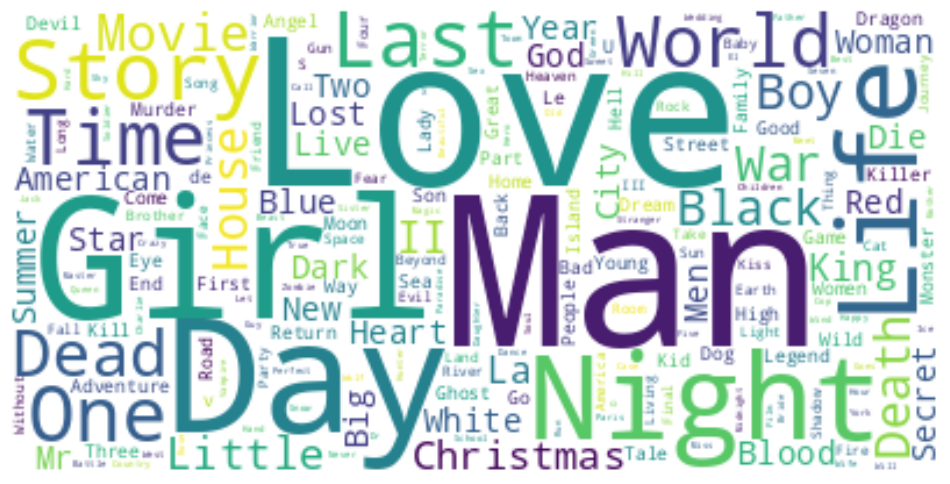

In [22]:
#wordcloud of title
wordcloud=WordCloud(collocations=False, background_color='white').generate(' '.join(df['title']))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [23]:
#removing null values
df['tagline']=df['tagline'].fillna('')

(-0.5, 399.5, 199.5, -0.5)

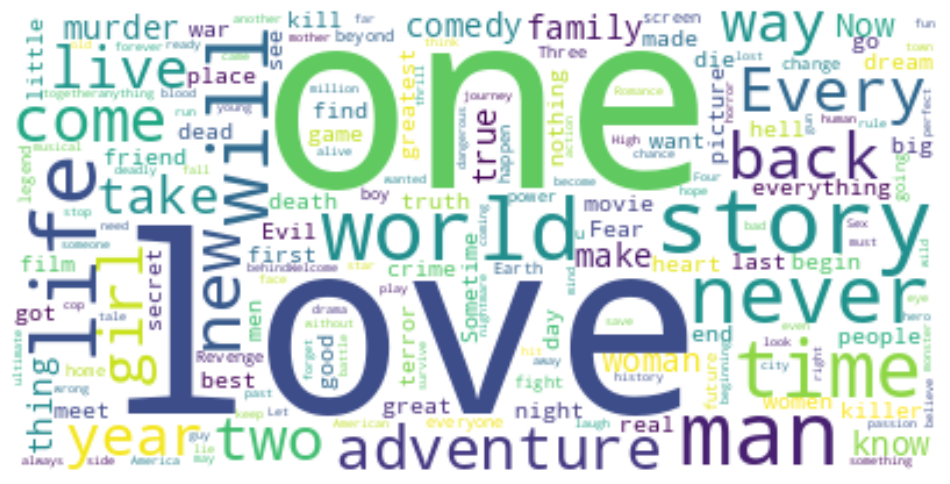

In [24]:
#wordcloud of tagline
wordcloud=WordCloud(collocations=False, background_color='white').generate(' '.join(df['tagline']))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Are Franchises successful?

In [25]:
#counting franchises in dataframe
df['belongs_to_collection'].value_counts().head(20)

,count
belongs_to_collection,
The Bowery Boys,29
Totò Collection,27
Zatôichi: The Blind Swordsman,26
James Bond Collection,26
The Carry On Collection,25
Charlie Chan (Sidney Toler) Collection,21
Pokémon Collection,20
Godzilla (Showa) Collection,16
Uuno Turhapuro,15


In [27]:
#summarising franchises based on budget, revenue, rating, popularity and votes
franchises=df.groupby(df['belongs_to_collection']).agg({"title":"count", "budget_musd": ["sum", "mean"], "revenue_musd": ["sum", "mean"],"vote_average": "mean", "popularity": "mean", "roi": "median", "vote_count": "mean"})
franchises

title budget_musd       revenue_musd  \
                                     count         sum  mean          sum   
belongs_to_collection                                                       
... Has Fallen Collection                2       130.0  65.0   366.780087   
00 Schneider Filmreihe                   1         0.0   NaN     0.000000   
08/15 Collection                         1         0.0   NaN     0.000000   
100 Girls Collection                     2         0.0   NaN     0.000000   
101 Dalmatians (Animated) Collection     2         4.0   4.0   215.880014   
...                                    ...         ...   ...          ...   
Сказки Чуковского                        1         0.0   NaN     0.000000   
Чебурашка и крокодил Гена                1         0.0   NaN     0.000000   
Что Творят мужчины! (Коллекция)          2         2.0   2.0     0.000000   
男はつらいよ シリーズ                              3         0.0   NaN     0.000000   
식객 시리즈                                   2         0.0   NaN     0.000000   

                                                 vote_average popularity  \
                                            mean         mean       mean   
belongs_to_collection                                                      
... Has Fallen Collection             183.390043         6.00  13.008090   
00 Schneider Filmreihe                       NaN         6.50   1.931299   
08/15 Collection                             NaN         5.90   0.628127   
100 Girls Collection                         NaN         5.15   3.078652   
101 Dalmatians (Animated) Collection  215.880014         6.25  13.063212   
...                                          ...          ...        ...   
Сказки Чуковского                            NaN         3.00   0.731334   
Чебурашка и крокодил Гена                    NaN         6.70   0.881504   
Что Творят мужчины! (Коллекция)              NaN         3.15   1.299605   
男はつらいよ シリーズ                                  NaN         7.00   0.038901   
식객 시리즈                                       NaN         4.95   0.157245   

                                            roi   vote_count  
                                         median         mean  
belongs_to_collection                                         
... Has Fallen Collection              1.864804  2333.000000  
00 Schneider Filmreihe                      NaN    16.000000  
08/15 Collection                            NaN     4.000000  
100 Girls Collection                        NaN    64.000000  
101 Dalmatians (Animated) Collection  52.970003   937.000000  
...                                         ...          ...  
Сказки Чуковского                           NaN     3.000000  
Чебурашка и крокодил Гена                   NaN     7.000000  
Что Творят мужчины! (Коллекция)             NaN     5.500000  
男はつらいよ シリーズ                                 NaN     0.666667  
식객 시리즈                                      NaN     3.500000  

[1691 rows x 9 columns]

In [28]:
franchises

title budget_musd       revenue_musd  \
                                     count         sum  mean          sum   
belongs_to_collection                                                       
... Has Fallen Collection                2       130.0  65.0   366.780087   
00 Schneider Filmreihe                   1         0.0   NaN     0.000000   
08/15 Collection                         1         0.0   NaN     0.000000   
100 Girls Collection                     2         0.0   NaN     0.000000   
101 Dalmatians (Animated) Collection     2         4.0   4.0   215.880014   
...                                    ...         ...   ...          ...   
Сказки Чуковского                        1         0.0   NaN     0.000000   
Чебурашка и крокодил Гена                1         0.0   NaN     0.000000   
Что Творят мужчины! (Коллекция)          2         2.0   2.0     0.000000   
男はつらいよ シリーズ                              3         0.0   NaN     0.000000   
식객 시리즈                                   2         0.0   NaN     0.000000   

                                                 vote_average popularity  \
                                            mean         mean       mean   
belongs_to_collection                                                      
... Has Fallen Collection             183.390043         6.00  13.008090   
00 Schneider Filmreihe                       NaN         6.50   1.931299   
08/15 Collection                             NaN         5.90   0.628127   
100 Girls Collection                         NaN         5.15   3.078652   
101 Dalmatians (Animated) Collection  215.880014         6.25  13.063212   
...                                          ...          ...        ...   
Сказки Чуковского                            NaN         3.00   0.731334   
Чебурашка и крокодил Гена                    NaN         6.70   0.881504   
Что Творят мужчины! (Коллекция)              NaN         3.15   1.299605   
男はつらいよ シリーズ                                  NaN         7.00   0.038901   
식객 시리즈                                       NaN         4.95   0.157245   

                                            roi   vote_count  
                                         median         mean  
belongs_to_collection                                         
... Has Fallen Collection              1.864804  2333.000000  
00 Schneider Filmreihe                      NaN    16.000000  
08/15 Collection                            NaN     4.000000  
100 Girls Collection                        NaN    64.000000  
101 Dalmatians (Animated) Collection  52.970003   937.000000  
...                                         ...          ...  
Сказки Чуковского                           NaN     3.000000  
Чебурашка и крокодил Гена                   NaN     7.000000  
Что Творят мужчины! (Коллекция)             NaN     5.500000  
男はつらいよ シリーズ                                 NaN     0.666667  
식객 시리즈                                      NaN     3.500000  

[1691 rows x 9 columns]

In [29]:
#Top franchises by total number of movies
franchises.nlargest(10, ("title", "count"))

title budget_musd             \
                                       count         sum       mean   
belongs_to_collection                                                 
The Bowery Boys                           29      0.0000        NaN   
Totò Collection                           27      0.0000        NaN   
James Bond Collection                     26   1539.6500  59.217308   
Zatôichi: The Blind Swordsman             26      0.0000        NaN   
The Carry On Collection                   25      0.0000        NaN   
Charlie Chan (Sidney Toler) Collection    21      0.0000        NaN   
Pokémon Collection                        20    250.7204  50.144080   
Godzilla (Showa) Collection               16      2.8100   0.562000   
Charlie Chan (Warner Oland) Collection    15      0.0000        NaN   
Dragon Ball Z (Movie) Collection          15      5.0000   5.000000   

                                       revenue_musd             vote_average  \
                                                sum        mean         mean   
belongs_to_collection                                                          
The Bowery Boys                            0.000000         NaN     6.675000   
Totò Collection                            0.000000         NaN     6.837037   
James Bond Collection                   7106.970239  273.345009     6.338462   
Zatôichi: The Blind Swordsman              0.000000         NaN     6.403846   
The Carry On Collection                    0.000000         NaN     6.168000   
Charlie Chan (Sidney Toler) Collection     0.000000         NaN     6.609524   
Pokémon Collection                       601.865958   66.873995     6.055000   
Godzilla (Showa) Collection                0.000000         NaN     5.975000   
Charlie Chan (Warner Oland) Collection     0.000000         NaN     6.658333   
Dragon Ball Z (Movie) Collection         112.121192   56.060596     6.606667   

                                       popularity        roi   vote_count  
                                             mean     median         mean  
belongs_to_collection                                                      
The Bowery Boys                          0.198006        NaN     0.724138  
Totò Collection                          1.047324        NaN    18.037037  
James Bond Collection                   13.453502   5.128922  1284.307692  
Zatôichi: The Blind Swordsman            1.100603        NaN    11.192308  
The Carry On Collection                  3.220430        NaN    21.040000  
Charlie Chan (Sidney Toler) Collection   0.630996        NaN     5.809524  
Pokémon Collection                       4.374284   3.464976    71.100000  
Godzilla (Showa) Collection              3.422842        NaN    39.750000  
Charlie Chan (Warner Oland) Collection   0.664986        NaN     6.866667  
Dragon Ball Z (Movie) Collection         6.183563  11.353638   133.333333

In [30]:
# Top 20 franchises by sum of revenue
franchises.nlargest(20, ("revenue_musd", "sum"))

title budget_musd              \
                                    count         sum        mean   
belongs_to_collection                                               
Harry Potter Collection                 8     1280.00  160.000000   
Star Wars Collection                    8      854.35  106.793750   
James Bond Collection                  26     1539.65   59.217308   
The Fast and the Furious Collection     8     1009.00  126.125000   
Pirates of the Caribbean Collection     5     1250.00  250.000000   
Transformers Collection                 5      965.00  193.000000   
Despicable Me Collection                6      299.00   74.750000   
The Twilight Collection                 5      385.00   77.000000   
Ice Age Collection                      5      429.00   85.800000   
Jurassic Park Collection                4      379.00   94.750000   
Shrek Collection                        5      535.00  133.750000   
The Hunger Games Collection             4      490.00  122.500000   
The Hobbit Collection                   3      750.00  250.000000   
The Avengers Collection                 2      500.00  250.000000   
The Lord of the Rings Collection        3      266.00   88.666667   
X-Men Collection                        6      983.00  163.833333   
Avatar Collection                       1      237.00  237.000000   
Mission: Impossible Collection          5      650.00  130.000000   
Spider-Man Collection                   3      597.00  199.000000   
The Dark Knight Collection              3      585.00  195.000000   

                                    revenue_musd              vote_average  \
                                             sum         mean         mean   
belongs_to_collection                                                        
Harry Potter Collection              7707.367425   963.420928     7.537500   
Star Wars Collection                 7434.494790   929.311849     7.375000   
James Bond Collection                7106.970239   273.345009     6.338462   
The Fast and the Furious Collection  5125.098793   640.637349     6.662500   
Pirates of the Caribbean Collection  4521.576826   904.315365     6.880000   
Transformers Collection              4366.101244   873.220249     6.140000   
Despicable Me Collection             3691.070216   922.767554     6.783333   
The Twilight Collection              3342.107290   668.421458     5.840000   
Ice Age Collection                   3216.708553   643.341711     6.380000   
Jurassic Park Collection             3031.484143   757.871036     6.500000   
Shrek Collection                     2955.807008   738.951752     6.460000   
The Hunger Games Collection          2944.162634   736.040659     6.875000   
The Hobbit Collection                2935.523356   978.507785     7.233333   
The Avengers Collection              2924.961604  1462.480802     7.350000   
The Lord of the Rings Collection     2916.544743   972.181581     8.033333   
X-Men Collection                     2808.832317   468.138720     6.816667   
Avatar Collection                    2787.965087  2787.965087     7.200000   
Mission: Impossible Collection       2778.977995   555.795599     6.600000   
Spider-Man Collection                2496.346518   832.115506     6.466667   
The Dark Knight Collection           2463.716216   821.238739     7.800000   

                                     popularity        roi    vote_count  
                                           mean     median          mean  
belongs_to_collection                                                     
Harry Potter Collection               26.253893   5.165086   5983.250000  
Star Wars Collection                  23.410919   7.239637   5430.375000  
James Bond Collection                 13.453502   5.128922   1284.307692  
The Fast and the Furious Collection   10.799435   3.942154   3197.000000  
Pirates of the Caribbean Collection   53.972237   2.453009   5016.000000  
Transformers Collection               14.425077   4.1

In [31]:
# Top 20 franchises by sum of budget
franchises.nlargest(20, ("budget_musd", "sum"))

title budget_musd              \
                                        count         sum        mean   
belongs_to_collection                                                   
James Bond Collection                      26     1539.65   59.217308   
Harry Potter Collection                     8     1280.00  160.000000   
Pirates of the Caribbean Collection         5     1250.00  250.000000   
The Fast and the Furious Collection         8     1009.00  126.125000   
X-Men Collection                            6      983.00  163.833333   
Transformers Collection                     5      965.00  193.000000   
Star Wars Collection                        8      854.35  106.793750   
The Hobbit Collection                       3      750.00  250.000000   
The Terminator Collection                   5      661.40  132.280000   
Mission: Impossible Collection              5      650.00  130.000000   
Spider-Man Collection                       3      597.00  199.000000   
The Dark Knight Collection                  3      585.00  195.000000   
Captain America Collection                  3      560.00  186.666667   
The Chronicles of Narnia Collection         3      560.00  186.666667   
Iron Man Collection                         3      540.00  180.000000   
Shrek Collection                            5      535.00  133.750000   
Star Trek: Alternate Reality Collection     3      525.00  175.000000   
Madagascar Collection                       4      502.00  125.500000   
The Avengers Collection                     2      500.00  250.000000   
Cars Collection                             3      495.00  165.000000   

                                        revenue_musd               \
                                                 sum         mean   
belongs_to_collection                                               
James Bond Collection                    7106.970239   273.345009   
Harry Potter Collection                  7707.367425   963.420928   
Pirates of the Caribbean Collection      4521.576826   904.315365   
The Fast and the Furious Collection      5125.098793   640.637349   
X-Men Collection                         2808.832317   468.138720   
Transformers Collection                  4366.101244   873.220249   
Star Wars Collection                     7434.494790   929.311849   
The Hobbit Collection                    2935.523356   978.507785   
The Terminator Collection                1845.327738   369.065548   
Mission: Impossible Collection           2778.977995   555.795599   
Spider-Man Collection                    2496.346518   832.115506   
The Dark Knight Collection               2463.716216   821.238739   
Captain America Collection               2238.640841   746.213614   
The Chronicles of Narnia Collection      1584.144587   528.048196   
Iron Man Collection                      2424.547547   808.182516   
Shrek Collection                         2955.807008   738.951752   
Star Trek: Alternate Reality Collection  1196.517508   398.839169   
Madagascar Collection                    2257.054393   564.263598   
The Avengers Collection                  2924.961604  1462.480802   
Cars Collection                          1372.005602   457.335201   

                                        vote_average popularity       roi  \
                                                mean       mean    median   
belongs_to_collection                                                       
James Bond Collection                       6.338462  13.453502  5.128922   
Harry Potter Collection                     7.537500  26.253893  5.165086   
Pirates of the Caribbean Collection         6.880000  53.972237  2.453009   
The Fast and the Furious Collection         6.662500  10.799435  3.942154   
X-Men Collection                            6.816667   9.707541  2.023632   
Transformers Collection                     6.140000  14.425077  4.197167   
Star Wars Collection                        7.375000  23.410919  7.239637   
Th

In [32]:
# Top 20 franchises by mean vote average
franchises[franchises[("vote_count", "mean")] >= 1000].nlargest(20, ("vote_average", "mean"))

title budget_musd              \
                                    count         sum        mean   
belongs_to_collection                                               
The Lord of the Rings Collection        3      266.00   88.666667   
The Godfather Collection                3       73.00   24.333333   
Blade Runner Collection                 1       28.00   28.000000   
The Man With No Name Collection         3        2.00    0.666667   
The Dark Knight Collection              3      585.00  195.000000   
Guardians of the Galaxy Collection      2      370.00  185.000000   
Kill Bill Collection                    2       60.00   30.000000   
Kingsman Collection                     1       81.00   81.000000   
How to Train Your Dragon Collection     2      310.00  155.000000   
Harry Potter Collection                 8     1280.00  160.000000   
Toy Story Collection                    3      320.00  106.666667   
Back to the Future Collection           3       99.00   33.000000   
Trainspotting Collection                2       22.00   11.000000   
Deadpool Collection                     1       58.00   58.000000   
The Incredibles Collection              1       92.00   92.000000   
Star Wars Collection                    8      854.35  106.793750   
The Avengers Collection                 2      500.00  250.000000   
The Lego Movie Collection               2      140.00   70.000000   
Tangled Collection                      2      260.00  260.000000   
The Space Odyssey Series                2       38.50   19.250000   

                                    revenue_musd              vote_average  \
                                             sum         mean         mean   
belongs_to_collection                                                        
The Lord of the Rings Collection     2916.544743   972.181581     8.033333   
The Godfather Collection              429.375314   143.125105     7.966667   
Blade Runner Collection                33.139618    33.139618     7.900000   
The Man With No Name Collection        35.500000    11.833333     7.833333   
The Dark Knight Collection           2463.716216   821.238739     7.800000   
Guardians of the Galaxy Collection   1636.744770   818.372385     7.750000   
Kill Bill Collection                  333.108461   166.554231     7.700000   
Kingsman Collection                   414.351546   414.351546     7.600000   
How to Train Your Dragon Collection  1104.001807   552.000904     7.550000   
Harry Potter Collection              7707.367425   963.420928     7.537500   
Toy Story Collection                 1937.890605   645.963535     7.533333   
Back to the Future Collection         957.637345   319.212448     7.500000   
Trainspotting Collection               57.903789    28.951895     7.450000   
Deadpool Collection                   783.112979   783.112979     7.400000   
The Incredibles Collection            631.442092   631.442092     7.400000   
Star Wars Collection                 7434.494790   929.311849     7.375000   
The Avengers Collection              2924.961604  1462.480802     7.350000   
The Lego Movie Collection             781.111076   390.555538     7.350000   
Tangled Collection                    591.794936   591.794936     7.250000   
The Space Odyssey Series              109.100657    54.550329     7.250000   

                                     popularity        roi    vote_count  
                                           mean     median          mean  
belongs_to_collection                                                     
The Lord of the Rings Collection      30.272873  10.725157   8253.000000  
The Godfather Collection              31.641307   2.657142   3677.000000  
Blade Runner Collection               96.272374   0.183558   3833.000000  
The Man With No Name Collection       14.171278  24.000000   1422.666667  
The Dark Knight Collection            57.418393   3.339756   9681.000000  
Guardians of the Galaxy Collection   119.311296   3.4

# Top Directors

In [33]:
#counting directors
directors_movies=df['director'].value_counts()
directors_movies.head(10)

,count
director,
John Ford,66
Michael Curtiz,65
Werner Herzog,54
Alfred Hitchcock,53
Georges Méliès,49
Woody Allen,49
Jean-Luc Godard,46
Sidney Lumet,46
Charlie Chaplin,44


In [34]:
#top directors based on total revenue generated
directors_revenue=df['revenue_musd'].groupby(df['director']).sum()
directors_revenue.sort_values(ascending=False).head(10)

,revenue_musd
director,
Steven Spielberg,9256.621422
Peter Jackson,6528.244659
Michael Bay,6437.466781
James Cameron,5900.610310
David Yates,5334.563196
Christopher Nolan,4747.408665
Robert Zemeckis,4138.233542
Tim Burton,4032.916124
Ridley Scott,3917.529240
